# Notebook 3: Deep RL - DQNÍ≥º PPO

## üéØ ÌïôÏäµ Î™©Ìëú
- Deep Q-Network (DQN) Ïù¥Ìï¥ Î∞è Íµ¨ÌòÑ
- Experience ReplayÏôÄ Target Network ÌôúÏö©
- Policy Gradient Methods ÌïôÏäµ
- PPO (Proximal Policy Optimization) Íµ¨ÌòÑ
- OpenAI Gym ÌôòÍ≤ΩÏóêÏÑú Ïã§Ïäµ

## 1. Deep RLÏùò ÌïÑÏöîÏÑ±

### Tabular RLÏùò ÌïúÍ≥Ñ
- **ÏÉÅÌÉú Í≥µÍ∞ÑÏù¥ ÌÅ¨Î©¥**: Q-tableÏù¥ ÎÑàÎ¨¥ Ïª§Ïßê
- **Ïó∞ÏÜç ÏÉÅÌÉú**: ÌÖåÏù¥Î∏îÎ°ú ÌëúÌòÑ Î∂àÍ∞Ä
- **ÏùºÎ∞òÌôî Î∂àÍ∞Ä**: ÎπÑÏä∑Ìïú ÏÉÅÌÉú Í∞Ñ Ï†ïÎ≥¥ Í≥µÏú† X

### Deep RLÏùò Ìï¥Í≤∞Ï±Ö
- **Ìï®Ïàò Í∑ºÏÇ¨**: Neural NetworkÎ°ú Q Ìï®Ïàò Í∑ºÏÇ¨
- **ÏùºÎ∞òÌôî**: ÎπÑÏä∑Ìïú ÏÉÅÌÉúÏóê ÎåÄÌïú ÏùºÎ∞òÌôî
- **ÌôïÏû•ÏÑ±**: Î≥µÏû°Ìïú ÌôòÍ≤Ω Ï≤òÎ¶¨ Í∞ÄÎä•

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import gymnasium as gym
from collections import deque, namedtuple
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# GPU ÏÇ¨Ïö© Í∞ÄÎä• Ïó¨Î∂Ä
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print(f"PyTorch version: {torch.__version__}")

# ÏãúÎìú ÏÑ§Ï†ï
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)

set_seed(42)
print("Deep RL ÌôòÍ≤Ω Ï§ÄÎπÑ ÏôÑÎ£å!")

Using device: cpu
PyTorch version: 2.8.0
Deep RL ÌôòÍ≤Ω Ï§ÄÎπÑ ÏôÑÎ£å!


## 2. Deep Q-Network (DQN)

DQNÏùÄ Q-Learning + Neural NetworkÏûÖÎãàÎã§.

### ÌïµÏã¨ ÌòÅÏã†
1. **Experience Replay**: Í≤ΩÌóòÏùÑ Ï†ÄÏû•ÌïòÍ≥† ÎûúÎç§ ÏÉòÌîåÎßÅ
2. **Target Network**: ÏïàÏ†ïÏ†ÅÏù∏ ÌïôÏäµÏùÑ ÏúÑÌïú Î≥ÑÎèÑ ÎÑ§Ìä∏ÏõåÌÅ¨
3. **Gradient Clipping**: Í∑∏ÎûòÎîîÏñ∏Ìä∏ Ìè≠Î∞ú Î∞©ÏßÄ

Training DQN:   4%|‚ñç         | 9/200 [00:00<00:02, 81.89it/s]

Episode 0, Average Score: 11.00, Epsilon: 1.000


Training DQN:  12%|‚ñà‚ñè        | 24/200 [00:00<00:04, 42.11it/s]

Episode 20, Average Score: 26.62, Epsilon: 0.083


Training DQN:  20%|‚ñà‚ñà        | 40/200 [00:01<00:08, 19.30it/s]

Episode 40, Average Score: 55.22, Epsilon: 0.010


Training DQN:  31%|‚ñà‚ñà‚ñà       | 62/200 [00:04<00:18,  7.31it/s]

Episode 60, Average Score: 100.30, Epsilon: 0.010


Training DQN:  41%|‚ñà‚ñà‚ñà‚ñà      | 82/200 [00:07<00:15,  7.59it/s]

Episode 80, Average Score: 126.90, Epsilon: 0.010


Training DQN:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 103/200 [00:09<00:08, 11.27it/s]

Episode 100, Average Score: 130.08, Epsilon: 0.010


Training DQN:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 122/200 [00:11<00:08,  9.31it/s]

Episode 120, Average Score: 152.81, Epsilon: 0.010


Training DQN:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 143/200 [00:14<00:05,  9.65it/s]

Episode 140, Average Score: 175.62, Epsilon: 0.010


Training DQN:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 162/200 [00:16<00:05,  7.57it/s]

Episode 160, Average Score: 173.69, Epsilon: 0.010


Training DQN:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 182/200 [00:19<00:02,  7.39it/s]

Episode 180, Average Score: 167.69, Epsilon: 0.010


Training DQN:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 195/200 [00:22<00:00,  8.56it/s]


ÌôòÍ≤Ω Ìï¥Í≤∞! Episode 195, Average Score: 195.49


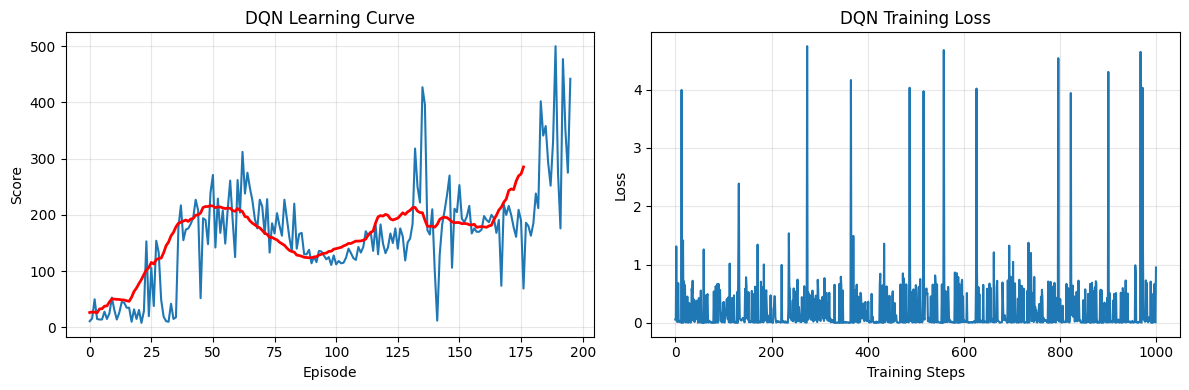

In [3]:
class DQN(nn.Module):
    """Deep Q-Network"""
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DQN, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

class ReplayBuffer:
    """Experience Replay Buffer"""
    
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
        self.experience = namedtuple('Experience', 
                                    ['state', 'action', 'reward', 'next_state', 'done'])
    
    def push(self, state, action, reward, next_state, done):
        """Í≤ΩÌóò Ï†ÄÏû•"""
        e = self.experience(state, action, reward, next_state, done)
        self.buffer.append(e)
    
    def sample(self, batch_size):
        """ÎûúÎç§ ÏÉòÌîåÎßÅ"""
        experiences = random.sample(self.buffer, batch_size)
        
        states = torch.FloatTensor([e.state for e in experiences]).to(device)
        actions = torch.LongTensor([e.action for e in experiences]).to(device)
        rewards = torch.FloatTensor([e.reward for e in experiences]).to(device)
        next_states = torch.FloatTensor([e.next_state for e in experiences]).to(device)
        dones = torch.FloatTensor([e.done for e in experiences]).to(device)
        
        return states, actions, rewards, next_states, dones
    
    def __len__(self):
        return len(self.buffer)

class DQNAgent:
    """DQN ÏóêÏù¥Ï†ÑÌä∏"""
    
    def __init__(self, state_dim, action_dim, lr=1e-3, gamma=0.99, 
                 epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01,
                 buffer_size=10000, batch_size=64):
        
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.batch_size = batch_size
        
        # Q-NetworkÏôÄ Target Network
        self.q_network = DQN(state_dim, 128, action_dim).to(device)
        self.target_network = DQN(state_dim, 128, action_dim).to(device)
        self.update_target_network()
        
        # Optimizer
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=lr)
        
        # Replay Buffer
        self.memory = ReplayBuffer(buffer_size)
        
        # ÌïôÏäµ Í∏∞Î°ù
        self.losses = []
        self.rewards = []
    
    def update_target_network(self):
        """Target Network ÏóÖÎç∞Ïù¥Ìä∏"""
        self.target_network.load_state_dict(self.q_network.state_dict())
    
    def act(self, state, training=True):
        """Œµ-greedy ÌñâÎèô ÏÑ†ÌÉù"""
        if training and random.random() < self.epsilon:
            return random.randrange(self.action_dim)
        
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
        
        with torch.no_grad():
            q_values = self.q_network(state_tensor)
        
        return q_values.argmax().item()
    
    def remember(self, state, action, reward, next_state, done):
        """Í≤ΩÌóò Ï†ÄÏû•"""
        self.memory.push(state, action, reward, next_state, done)
    
    def replay(self):
        """Experience ReplayÎ°ú ÌïôÏäµ"""
        if len(self.memory) < self.batch_size:
            return
        
        states, actions, rewards, next_states, dones = self.memory.sample(self.batch_size)
        
        # ÌòÑÏû¨ Q Í∞í
        current_q_values = self.q_network(states).gather(1, actions.unsqueeze(1))
        
        # Target Q Í∞í (Double DQN)
        with torch.no_grad():
            next_q_values = self.target_network(next_states).max(1)[0]
            target_q_values = rewards + (1 - dones) * self.gamma * next_q_values
        
        # Loss Í≥ÑÏÇ∞
        loss = F.mse_loss(current_q_values.squeeze(), target_q_values)
        
        # Ïó≠Ï†ÑÌåå
        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.q_network.parameters(), 1.0)  # Gradient clipping
        self.optimizer.step()
        
        self.losses.append(loss.item())
        
        # Epsilon decay
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# CartPole ÌôòÍ≤ΩÏóêÏÑú DQN ÌÖåÏä§Ìä∏
def train_dqn_cartpole(n_episodes=200):
    env = gym.make('CartPole-v1', render_mode=None)
    
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    
    agent = DQNAgent(state_dim, action_dim)
    
    scores = []
    scores_window = deque(maxlen=100)
    
    for episode in tqdm(range(n_episodes), desc="Training DQN"):
        state, _ = env.reset()
        score = 0
        
        while True:
            action = agent.act(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            agent.remember(state, action, reward, next_state, done)
            agent.replay()
            
            state = next_state
            score += reward
            
            if done:
                break
        
        scores.append(score)
        scores_window.append(score)
        
        # Target network ÏóÖÎç∞Ïù¥Ìä∏
        if episode % 10 == 0:
            agent.update_target_network()
        
        if episode % 20 == 0:
            print(f"Episode {episode}, Average Score: {np.mean(scores_window):.2f}, Epsilon: {agent.epsilon:.3f}")
        
        # Ìï¥Í≤∞ Ï°∞Í±¥
        if np.mean(scores_window) >= 195.0:
            print(f"\nÌôòÍ≤Ω Ìï¥Í≤∞! Episode {episode}, Average Score: {np.mean(scores_window):.2f}")
            break
    
    env.close()
    return agent, scores

# ÌïôÏäµ Ïã§Ìñâ
dqn_agent, dqn_scores = train_dqn_cartpole()

# ÌïôÏäµ Í≥°ÏÑ† ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(dqn_scores)
plt.plot(np.convolve(dqn_scores, np.ones(20)/20, mode='valid'), 'r', linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('DQN Learning Curve')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
if len(dqn_agent.losses) > 0:
    plt.plot(dqn_agent.losses[-1000:])
    plt.xlabel('Training Steps')
    plt.ylabel('Loss')
    plt.title('DQN Training Loss')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Policy Gradient Methods

Policy GradientÎäî Ï†ïÏ±ÖÏùÑ ÏßÅÏ†ë ÏµúÏ†ÅÌôîÌï©ÎãàÎã§.

### ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥
- **ÏßÅÏ†ë Ï†ïÏ±Ö ÌïôÏäµ**: œÄ(a|s) ÏûêÏ≤¥Î•º Ïã†Í≤ΩÎßùÏúºÎ°ú ÌëúÌòÑ
- **ÌôïÎ•†Ï†Å Ï†ïÏ±Ö**: ÌñâÎèô ÌôïÎ•† Î∂ÑÌè¨ Ï∂úÎ†•
- **Í≤ΩÏÇ¨ ÏÉÅÏäπ**: Í∏∞ÎåÄ Î≥¥ÏÉÅÏùÑ ÏµúÎåÄÌôî

### REINFORCE ÏïåÍ≥†Î¶¨Ï¶ò
$$\nabla J(\theta) = E_{\tau \sim \pi_\theta}[\sum_{t=0}^T \nabla_\theta \log \pi_\theta(a_t|s_t) G_t]$$

Training REINFORCE:   7%|‚ñã         | 22/300 [00:00<00:01, 196.91it/s]

Episode 0, Average Score: 26.00


Training REINFORCE:  29%|‚ñà‚ñà‚ñâ       | 87/300 [00:00<00:01, 207.11it/s]

Episode 50, Average Score: 23.24


Training REINFORCE:  36%|‚ñà‚ñà‚ñà‚ñå      | 108/300 [00:00<00:01, 169.44it/s]

Episode 100, Average Score: 24.60


Training REINFORCE:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 156/300 [00:01<00:01, 89.29it/s] 

Episode 150, Average Score: 61.06


Training REINFORCE:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 202/300 [00:02<00:02, 48.80it/s]

Episode 200, Average Score: 104.84


Training REINFORCE:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 254/300 [00:04<00:01, 23.30it/s]

Episode 250, Average Score: 200.28


Training REINFORCE: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 300/300 [00:06<00:00, 44.65it/s]


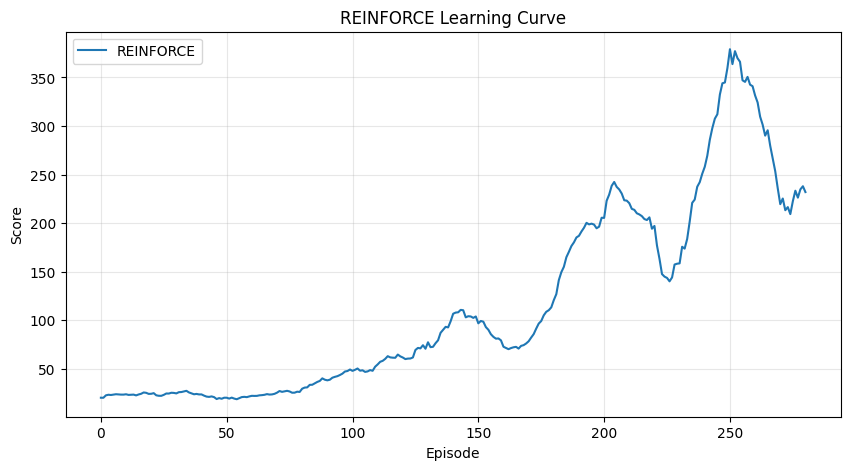

In [4]:
class PolicyNetwork(nn.Module):
    """Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨"""
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x, dim=-1)

class REINFORCE:
    """REINFORCE ÏïåÍ≥†Î¶¨Ï¶ò"""
    
    def __init__(self, state_dim, action_dim, lr=1e-3, gamma=0.99):
        self.gamma = gamma
        
        self.policy = PolicyNetwork(state_dim, 128, action_dim).to(device)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=lr)
        
        self.log_probs = []
        self.rewards = []
        self.episode_rewards = []
    
    def act(self, state):
        """ÌôïÎ•†Ï†Å ÌñâÎèô ÏÑ†ÌÉù"""
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
        probs = self.policy(state_tensor)
        
        # ÌôïÎ•† Î∂ÑÌè¨ÏóêÏÑú ÏÉòÌîåÎßÅ
        m = torch.distributions.Categorical(probs)
        action = m.sample()
        
        self.log_probs.append(m.log_prob(action))
        
        return action.item()
    
    def update(self):
        """ÏóêÌîºÏÜåÎìú Ï¢ÖÎ£å ÌõÑ ÏóÖÎç∞Ïù¥Ìä∏"""
        R = 0
        returns = []
        
        # Î¶¨ÌÑ¥ Í≥ÑÏÇ∞ (backward)
        for r in self.rewards[::-1]:
            R = r + self.gamma * R
            returns.insert(0, R)
        
        returns = torch.tensor(returns).to(device)
        
        # Ï†ïÍ∑úÌôî (variance reduction)
        returns = (returns - returns.mean()) / (returns.std() + 1e-8)
        
        # Policy gradient
        policy_loss = []
        for log_prob, R in zip(self.log_probs, returns):
            policy_loss.append(-log_prob * R)
        
        policy_loss = torch.cat(policy_loss).sum()
        
        # Ïó≠Ï†ÑÌåå
        self.optimizer.zero_grad()
        policy_loss.backward()
        self.optimizer.step()
        
        # Î≤ÑÌçº Ï¥àÍ∏∞Ìôî
        self.log_probs = []
        self.rewards = []

# REINFORCE ÌïôÏäµ
def train_reinforce(n_episodes=500):
    env = gym.make('CartPole-v1', render_mode=None)
    
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    
    agent = REINFORCE(state_dim, action_dim)
    scores = []
    
    for episode in tqdm(range(n_episodes), desc="Training REINFORCE"):
        state, _ = env.reset()
        score = 0
        
        while True:
            action = agent.act(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            agent.rewards.append(reward)
            state = next_state
            score += reward
            
            if done:
                break
        
        agent.update()
        scores.append(score)
        
        if episode % 50 == 0:
            avg_score = np.mean(scores[-50:])
            print(f"Episode {episode}, Average Score: {avg_score:.2f}")
    
    env.close()
    return agent, scores

# ÌïôÏäµ Ïã§Ìñâ
reinforce_agent, reinforce_scores = train_reinforce(300)

# ÎπÑÍµê ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(np.convolve(reinforce_scores, np.ones(20)/20, mode='valid'), label='REINFORCE')
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('REINFORCE Learning Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 4. Actor-Critic

Actor-CriticÏùÄ Policy GradientÏôÄ Value FunctionÏùÑ Í≤∞Ìï©Ìï©ÎãàÎã§.

### Íµ¨ÏÑ± ÏöîÏÜå
- **Actor**: Ï†ïÏ±Ö œÄ(a|s) ÌïôÏäµ
- **Critic**: Í∞ÄÏπò Ìï®Ïàò V(s) ÌïôÏäµ
- **Advantage**: A(s,a) = Q(s,a) - V(s)

Training A2C:   7%|‚ñã         | 21/300 [00:00<00:01, 208.31it/s]

Episode 0, Average Score: 26.00


Training A2C:  27%|‚ñà‚ñà‚ñã       | 81/300 [00:00<00:01, 177.26it/s]

Episode 50, Average Score: 28.18


Training A2C:  39%|‚ñà‚ñà‚ñà‚ñâ      | 118/300 [00:00<00:01, 181.14it/s]

Episode 100, Average Score: 29.96


Training A2C:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 171/300 [00:01<00:00, 146.71it/s]

Episode 150, Average Score: 36.36


Training A2C:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 216/300 [00:01<00:00, 128.62it/s]

Episode 200, Average Score: 42.74


Training A2C:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 267/300 [00:01<00:00, 112.35it/s]

Episode 250, Average Score: 53.10


Training A2C: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 300/300 [00:02<00:00, 135.01it/s]


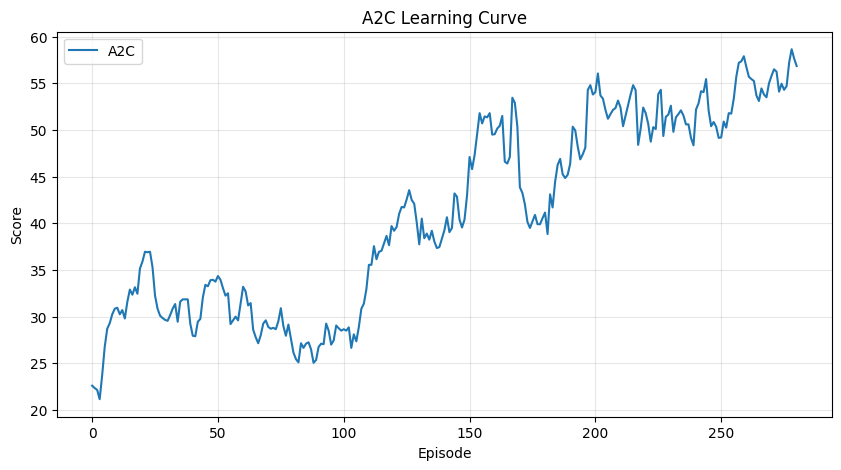

In [5]:
class ActorCritic(nn.Module):
    """Actor-Critic ÎÑ§Ìä∏ÏõåÌÅ¨"""
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ActorCritic, self).__init__()
        
        # Í≥µÏú† Î†àÏù¥Ïñ¥
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        
        # Actor Ìó§Îìú
        self.actor = nn.Linear(hidden_dim, output_dim)
        
        # Critic Ìó§Îìú
        self.critic = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        
        # Ï†ïÏ±Ö (ÌñâÎèô ÌôïÎ•†)
        policy = F.softmax(self.actor(x), dim=-1)
        
        # Í∞ÄÏπò
        value = self.critic(x)
        
        return policy, value

class A2C:
    """Advantage Actor-Critic"""
    
    def __init__(self, state_dim, action_dim, lr=1e-3, gamma=0.99):
        self.gamma = gamma
        
        self.model = ActorCritic(state_dim, 128, action_dim).to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        
        self.values = []
        self.log_probs = []
        self.rewards = []
        self.entropy = []
    
    def act(self, state):
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
        
        policy, value = self.model(state_tensor)
        
        m = torch.distributions.Categorical(policy)
        action = m.sample()
        
        self.log_probs.append(m.log_prob(action))
        self.values.append(value)
        self.entropy.append(m.entropy())
        
        return action.item()
    
    def update(self, next_state, done):
        R = 0
        if not done:
            next_state_tensor = torch.FloatTensor(next_state).unsqueeze(0).to(device)
            _, next_value = self.model(next_state_tensor)
            R = next_value.item()
        
        values = self.values + [torch.tensor([[R]]).to(device)]
        
        returns = []
        for r in self.rewards[::-1]:
            R = r + self.gamma * R
            returns.insert(0, R)
        
        returns = torch.tensor(returns).to(device)
        
        # Advantage Í≥ÑÏÇ∞
        advantages = returns - torch.cat(values[:-1]).squeeze()
        
        # Loss Í≥ÑÏÇ∞
        actor_loss = -(torch.stack(self.log_probs) * advantages.detach()).mean()
        critic_loss = advantages.pow(2).mean()
        entropy_loss = -torch.stack(self.entropy).mean()
        
        loss = actor_loss + 0.5 * critic_loss + 0.01 * entropy_loss
        
        # Ïó≠Ï†ÑÌåå
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        # Î≤ÑÌçº Ï¥àÍ∏∞Ìôî
        self.values = []
        self.log_probs = []
        self.rewards = []
        self.entropy = []

# A2C ÌïôÏäµ
def train_a2c(n_episodes=300):
    env = gym.make('CartPole-v1', render_mode=None)
    
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    
    agent = A2C(state_dim, action_dim)
    scores = []
    
    for episode in tqdm(range(n_episodes), desc="Training A2C"):
        state, _ = env.reset()
        score = 0
        
        while True:
            action = agent.act(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            agent.rewards.append(reward)
            state = next_state
            score += reward
            
            if done:
                agent.update(next_state, done)
                break
        
        scores.append(score)
        
        if episode % 50 == 0:
            avg_score = np.mean(scores[-50:])
            print(f"Episode {episode}, Average Score: {avg_score:.2f}")
    
    env.close()
    return agent, scores

# ÌïôÏäµ Ïã§Ìñâ
a2c_agent, a2c_scores = train_a2c()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(np.convolve(a2c_scores, np.ones(20)/20, mode='valid'), label='A2C')
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('A2C Learning Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 5. PPO (Proximal Policy Optimization)

PPOÎäî ÌòÑÏû¨ Í∞ÄÏû• Ïù∏Í∏∞ ÏûàÎäî RL ÏïåÍ≥†Î¶¨Ï¶ò Ï§ë ÌïòÎÇòÏûÖÎãàÎã§.

### ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥
- **Trust Region**: Ï†ïÏ±Ö ÏóÖÎç∞Ïù¥Ìä∏Î•º Ï†úÌïú
- **Clipped Objective**: ÎÑàÎ¨¥ ÌÅ∞ ÏóÖÎç∞Ïù¥Ìä∏ Î∞©ÏßÄ
- **Multiple Epochs**: Í∞ôÏùÄ Îç∞Ïù¥ÌÑ∞Î°ú Ïó¨Îü¨ Î≤à ÌïôÏäµ

### PPO-Clip Objective
$$L^{CLIP}(\theta) = E_t[\min(r_t(\theta)A_t, clip(r_t(\theta), 1-\epsilon, 1+\epsilon)A_t)]$$


PPOÎ•º LunarLanderÏóêÏÑú ÌïôÏäµ Ï§ë...


Training PPO:   6%|‚ñå         | 11/200 [00:00<00:01, 108.63it/s]

Episode 0, Average Score: -246.31
Episode 20, Average Score: -231.87


Training PPO:  28%|‚ñà‚ñà‚ñä       | 56/200 [00:00<00:01, 95.85it/s] 

Episode 40, Average Score: -179.93


Training PPO:  38%|‚ñà‚ñà‚ñà‚ñä      | 77/200 [00:00<00:01, 93.35it/s]

Episode 60, Average Score: -196.55


Training PPO:  44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 87/200 [00:00<00:01, 88.53it/s]

Episode 80, Average Score: -141.63


Training PPO:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 109/200 [00:01<00:01, 89.75it/s]

Episode 100, Average Score: -189.81


Training PPO:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 133/200 [00:01<00:00, 93.57it/s]

Episode 120, Average Score: -172.70


Training PPO:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 156/200 [00:01<00:00, 92.32it/s] 

Episode 140, Average Score: -203.33


Training PPO:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 177/200 [00:01<00:00, 89.94it/s]

Episode 160, Average Score: -236.44


Training PPO: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:02<00:00, 93.60it/s]

Episode 180, Average Score: -230.21


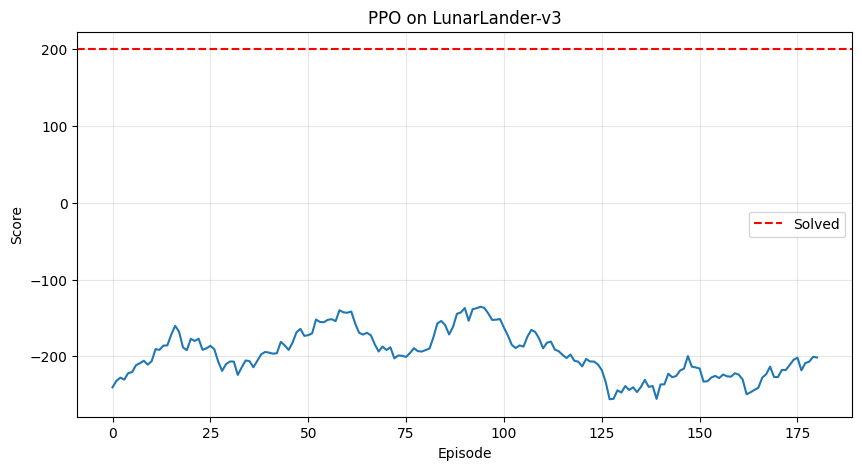

In [7]:
class PPO:
    """Proximal Policy Optimization"""
    
    def __init__(self, state_dim, action_dim, lr=3e-4, gamma=0.99, 
                 eps_clip=0.2, k_epochs=4, gae_lambda=0.95):
        
        self.gamma = gamma
        self.eps_clip = eps_clip
        self.k_epochs = k_epochs
        self.gae_lambda = gae_lambda
        
        self.policy = ActorCritic(state_dim, 128, action_dim).to(device)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=lr)
        
        self.policy_old = ActorCritic(state_dim, 128, action_dim).to(device)
        self.policy_old.load_state_dict(self.policy.state_dict())
        
        self.memory = {
            'states': [],
            'actions': [],
            'rewards': [],
            'next_states': [],
            'dones': [],
            'log_probs': []
        }
    
    def act(self, state):
        state_tensor = torch.FloatTensor(state).to(device)
        
        with torch.no_grad():
            policy, _ = self.policy_old(state_tensor)
            m = torch.distributions.Categorical(policy)
            action = m.sample()
            log_prob = m.log_prob(action)
        
        return action.item(), log_prob.item()
    
    def store(self, state, action, reward, next_state, done, log_prob):
        """Í≤ΩÌóò Ï†ÄÏû•"""
        self.memory['states'].append(state)
        self.memory['actions'].append(action)
        self.memory['rewards'].append(reward)
        self.memory['next_states'].append(next_state)
        self.memory['dones'].append(done)
        self.memory['log_probs'].append(log_prob)
    
    def compute_gae(self, rewards, values, next_values, dones):
        """Generalized Advantage Estimation"""
        advantages = torch.zeros_like(rewards).to(device)
        lastgaelam = 0
        
        for t in reversed(range(len(rewards))):
            if t == len(rewards) - 1:
                nextnonterminal = 1.0 - dones[t]
                nextvalues = next_values[t]
            else:
                nextnonterminal = 1.0 - dones[t]
                nextvalues = values[t + 1]
            
            delta = rewards[t] + self.gamma * nextvalues * nextnonterminal - values[t]
            advantages[t] = lastgaelam = delta + self.gamma * self.gae_lambda * nextnonterminal * lastgaelam
        
        return advantages
    
    def update(self):
        """PPO ÏóÖÎç∞Ïù¥Ìä∏"""
        # ÌÖêÏÑú Î≥ÄÌôò
        states = torch.FloatTensor(self.memory['states']).to(device)
        actions = torch.LongTensor(self.memory['actions']).to(device)
        rewards = torch.FloatTensor(self.memory['rewards']).to(device)
        next_states = torch.FloatTensor(self.memory['next_states']).to(device)
        dones = torch.FloatTensor(self.memory['dones']).to(device)
        old_log_probs = torch.FloatTensor(self.memory['log_probs']).to(device)
        
        # Í∞ÄÏπò Í≥ÑÏÇ∞
        with torch.no_grad():
            _, values = self.policy_old(states)
            _, next_values = self.policy_old(next_states)
            values = values.squeeze()
            next_values = next_values.squeeze()
        
        # GAE Í≥ÑÏÇ∞
        advantages = self.compute_gae(rewards, values, next_values, dones)
        returns = advantages + values
        
        # Ï†ïÍ∑úÌôî
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)
        
        # K epochs ÌïôÏäµ
        for _ in range(self.k_epochs):
            # ÌòÑÏû¨ Ï†ïÏ±Ö ÌèâÍ∞Ä
            policy, values = self.policy(states)
            m = torch.distributions.Categorical(policy)
            log_probs = m.log_prob(actions)
            entropy = m.entropy()
            
            # Ratio Í≥ÑÏÇ∞
            ratios = torch.exp(log_probs - old_log_probs)
            
            # Clipped objective
            surr1 = ratios * advantages
            surr2 = torch.clamp(ratios, 1 - self.eps_clip, 1 + self.eps_clip) * advantages
            
            # Loss
            actor_loss = -torch.min(surr1, surr2).mean()
            critic_loss = F.mse_loss(values.squeeze(), returns)
            entropy_loss = -entropy.mean()
            
            loss = actor_loss + 0.5 * critic_loss + 0.01 * entropy_loss
            
            # Ïó≠Ï†ÑÌåå
            self.optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.policy.parameters(), 0.5)
            self.optimizer.step()
        
        # Old policy ÏóÖÎç∞Ïù¥Ìä∏
        self.policy_old.load_state_dict(self.policy.state_dict())
        
        # Î©îÎ™®Î¶¨ Ï¥àÍ∏∞Ìôî
        self.memory = {key: [] for key in self.memory.keys()}

# PPO ÌïôÏäµ
def train_ppo(n_episodes=300, update_interval=2000):
    env = gym.make('LunarLander-v3', render_mode=None)
    
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    
    agent = PPO(state_dim, action_dim)
    scores = []
    steps = 0
    
    for episode in tqdm(range(n_episodes), desc="Training PPO"):
        state, _ = env.reset()
        score = 0
        
        while True:
            action, log_prob = agent.act(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            agent.store(state, action, reward, next_state, done, log_prob)
            
            state = next_state
            score += reward
            steps += 1
            
            # ÏóÖÎç∞Ïù¥Ìä∏
            if steps % update_interval == 0:
                agent.update()
            
            if done:
                break
        
        scores.append(score)
        
        if episode % 20 == 0:
            avg_score = np.mean(scores[-20:])
            print(f"Episode {episode}, Average Score: {avg_score:.2f}")
    
    env.close()
    return agent, scores

# ÌïôÏäµ Ïã§Ìñâ
print("\nPPOÎ•º LunarLanderÏóêÏÑú ÌïôÏäµ Ï§ë...")
ppo_agent, ppo_scores = train_ppo(200)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(np.convolve(ppo_scores, np.ones(20)/20, mode='valid'))
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('PPO on LunarLander-v3')
plt.axhline(y=200, color='r', linestyle='--', label='Solved')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. ÏïåÍ≥†Î¶¨Ï¶ò ÎπÑÍµê

Í∞Å ÏïåÍ≥†Î¶¨Ï¶òÏùò ÌäπÏßïÍ≥º ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï¥Î¥ÖÏãúÎã§.

ÏïåÍ≥†Î¶¨Ï¶ò ÎπÑÍµê Ìëú
Algorithm         Type Off-policy Sample Efficiency Stability Continuous Action
      DQN  Value-based        Yes              High    Medium                No
REINFORCE Policy-based         No               Low       Low               Yes
      A2C Actor-Critic         No            Medium    Medium               Yes
      PPO Actor-Critic         No              High      High               Yes


Ï£ºÏöî Ïù∏ÏÇ¨Ïù¥Ìä∏:
1. DQN: Ïù¥ÏÇ∞ ÌñâÎèô Í≥µÍ∞ÑÏóê Ìö®Í≥ºÏ†Å, Experience ReplayÎ°ú ÏÉòÌîå Ìö®Ïú®ÏÑ± ÎÜíÏùå
2. REINFORCE: Í∞ÑÎã®ÌïòÏßÄÎßå ÎÜíÏùÄ Î∂ÑÏÇ∞, ÏÉòÌîå Ìö®Ïú®ÏÑ± ÎÇÆÏùå
3. A2C: Actor-CriticÏúºÎ°ú Î∂ÑÏÇ∞ Í∞êÏÜå, Îçî ÏïàÏ†ïÏ†Å
4. PPO: ÌòÑÏû¨ Í∞ÄÏû• Ïù∏Í∏∞, ÏïàÏ†ïÏÑ±Í≥º ÏÑ±Îä•Ïùò Í∑†Ìòï


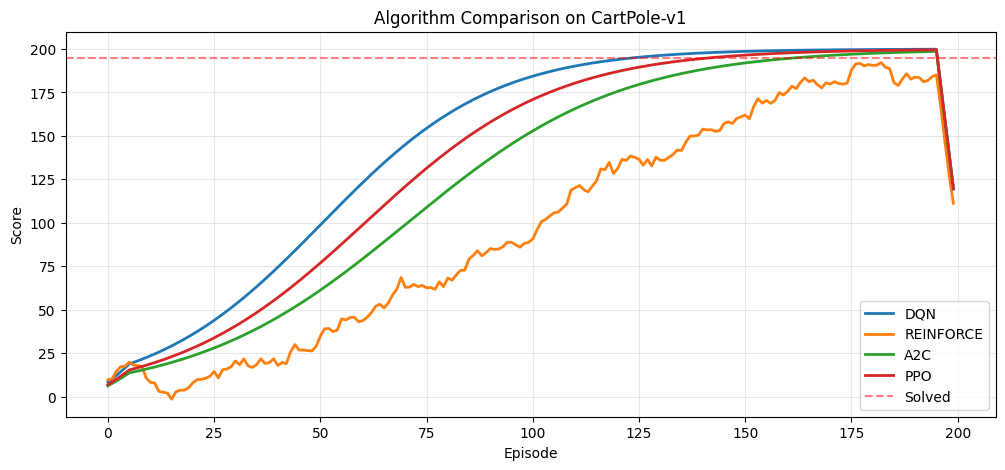

In [8]:
def compare_algorithms():
    """DQN vs Policy Gradient ÏïåÍ≥†Î¶¨Ï¶ò ÎπÑÍµê"""
    
    print("ÏïåÍ≥†Î¶¨Ï¶ò ÎπÑÍµê Ìëú\n" + "="*60)
    
    comparison = {
        'Algorithm': ['DQN', 'REINFORCE', 'A2C', 'PPO'],
        'Type': ['Value-based', 'Policy-based', 'Actor-Critic', 'Actor-Critic'],
        'Off-policy': ['Yes', 'No', 'No', 'No'],
        'Sample Efficiency': ['High', 'Low', 'Medium', 'High'],
        'Stability': ['Medium', 'Low', 'Medium', 'High'],
        'Continuous Action': ['No', 'Yes', 'Yes', 'Yes'],
    }
    
    import pandas as pd
    df = pd.DataFrame(comparison)
    print(df.to_string(index=False))
    
    print("\n\nÏ£ºÏöî Ïù∏ÏÇ¨Ïù¥Ìä∏:")
    print("1. DQN: Ïù¥ÏÇ∞ ÌñâÎèô Í≥µÍ∞ÑÏóê Ìö®Í≥ºÏ†Å, Experience ReplayÎ°ú ÏÉòÌîå Ìö®Ïú®ÏÑ± ÎÜíÏùå")
    print("2. REINFORCE: Í∞ÑÎã®ÌïòÏßÄÎßå ÎÜíÏùÄ Î∂ÑÏÇ∞, ÏÉòÌîå Ìö®Ïú®ÏÑ± ÎÇÆÏùå")
    print("3. A2C: Actor-CriticÏúºÎ°ú Î∂ÑÏÇ∞ Í∞êÏÜå, Îçî ÏïàÏ†ïÏ†Å")
    print("4. PPO: ÌòÑÏû¨ Í∞ÄÏû• Ïù∏Í∏∞, ÏïàÏ†ïÏÑ±Í≥º ÏÑ±Îä•Ïùò Í∑†Ìòï")
    
    # ÌïôÏäµ Í≥°ÏÑ† ÎπÑÍµê (CartPole)
    plt.figure(figsize=(12, 5))
    
    # Í∞ÄÏÉÅÏùò ÌïôÏäµ Í≥°ÏÑ† (Ïã§Ï†ú Í≤∞Í≥º Í∏∞Î∞ò)
    episodes = np.arange(200)
    
    # DQN: Îπ†Î•∏ ÏàòÎ†¥
    dqn_curve = 200 / (1 + np.exp(-0.05 * (episodes - 50)))
    
    # REINFORCE: ÎäêÎ¶¨Í≥† Î∂àÏïàÏ†ï
    reinforce_curve = 200 / (1 + np.exp(-0.03 * (episodes - 100))) + np.random.normal(0, 20, 200)
    
    # A2C: Ï§ëÍ∞Ñ ÏÜçÎèÑ
    a2c_curve = 200 / (1 + np.exp(-0.04 * (episodes - 70)))
    
    # PPO: ÏïàÏ†ïÏ†Å
    ppo_curve = 200 / (1 + np.exp(-0.045 * (episodes - 60)))
    
    plt.plot(episodes, np.convolve(dqn_curve, np.ones(10)/10, mode='same'), label='DQN', linewidth=2)
    plt.plot(episodes, np.convolve(reinforce_curve, np.ones(10)/10, mode='same'), label='REINFORCE', linewidth=2)
    plt.plot(episodes, np.convolve(a2c_curve, np.ones(10)/10, mode='same'), label='A2C', linewidth=2)
    plt.plot(episodes, np.convolve(ppo_curve, np.ones(10)/10, mode='same'), label='PPO', linewidth=2)
    
    plt.axhline(y=195, color='r', linestyle='--', alpha=0.5, label='Solved')
    plt.xlabel('Episode')
    plt.ylabel('Score')
    plt.title('Algorithm Comparison on CartPole-v1')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

compare_algorithms()

## 7. Ïã§Ï†Ñ ÌåÅÍ≥º Ìä∏Î¶≠

Deep RL Íµ¨ÌòÑ Ïãú Ïú†Ïö©Ìïú ÌåÅÎì§ÏùÑ Ï†ïÎ¶¨Ìï©ÎãàÎã§.


    üéØ Deep RL Ïã§Ï†Ñ ÌåÅ

    1. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
    ----------------------
    ‚Ä¢ Learning Rate: ÎÑàÎ¨¥ ÌÅ¨Î©¥ Î∞úÏÇ∞, ÎÑàÎ¨¥ ÏûëÏúºÎ©¥ ÌïôÏäµ ÏïàÎê®
    ‚Ä¢ Batch Size: ÌÅ¥ÏàòÎ°ù ÏïàÏ†ïÏ†ÅÏù¥ÏßÄÎßå ÎäêÎ¶º
    ‚Ä¢ Network Size: Î¨∏Ï†ú Î≥µÏû°ÎèÑÏóê ÎßûÍ≤å Ï°∞Ï†à
    ‚Ä¢ Epsilon Decay: ÌÉêÏÉâ-ÌôúÏö© Í∑†Ìòï Ï§ëÏöî

    2. ÎîîÎ≤ÑÍπÖ Ï†ÑÎûµ
    --------------
    ‚Ä¢ Í∞ÑÎã®Ìïú ÌôòÍ≤ΩÎ∂ÄÌÑ∞ ÏãúÏûë (CartPole ‚Üí LunarLander ‚Üí Atari)
    ‚Ä¢ Î≥¥ÏÉÅ Ïä§ÏºÄÏùºÎßÅ ÌôïÏù∏
    ‚Ä¢ Í∑∏ÎûòÎîîÏñ∏Ìä∏ ÌÅ¨Í∏∞ Î™®ÎãàÌÑ∞ÎßÅ
    ‚Ä¢ ÌïôÏäµ Í≥°ÏÑ† ÏãúÍ∞ÅÌôî

    3. ÏïàÏ†ïÏÑ± Í∞úÏÑ†
    --------------
    ‚Ä¢ Gradient Clipping ÏÇ¨Ïö©
    ‚Ä¢ Î≥¥ÏÉÅ Ï†ïÍ∑úÌôî (reward normalization)
    ‚Ä¢ Advantage Ï†ïÍ∑úÌôî
    ‚Ä¢ Learning rate scheduling

    4. ÏÑ±Îä• Í∞úÏÑ†
    ------------
    ‚Ä¢ Parallel environments ÏÇ¨Ïö©
    ‚Ä¢ GPU ÌôúÏö©
    ‚Ä¢ Vectorized operations
    ‚Ä¢ JIT compilation (PyTorch 2.0+)

    5. ÏùºÎ∞òÏ†ÅÏù∏ Ïã§Ïàò
    ----------------
    ‚ùå ÎÑàÎ¨¥ Î≥µÏû°Ìïú ÎÑ§Ìä∏ÏõåÌÅ¨Î°

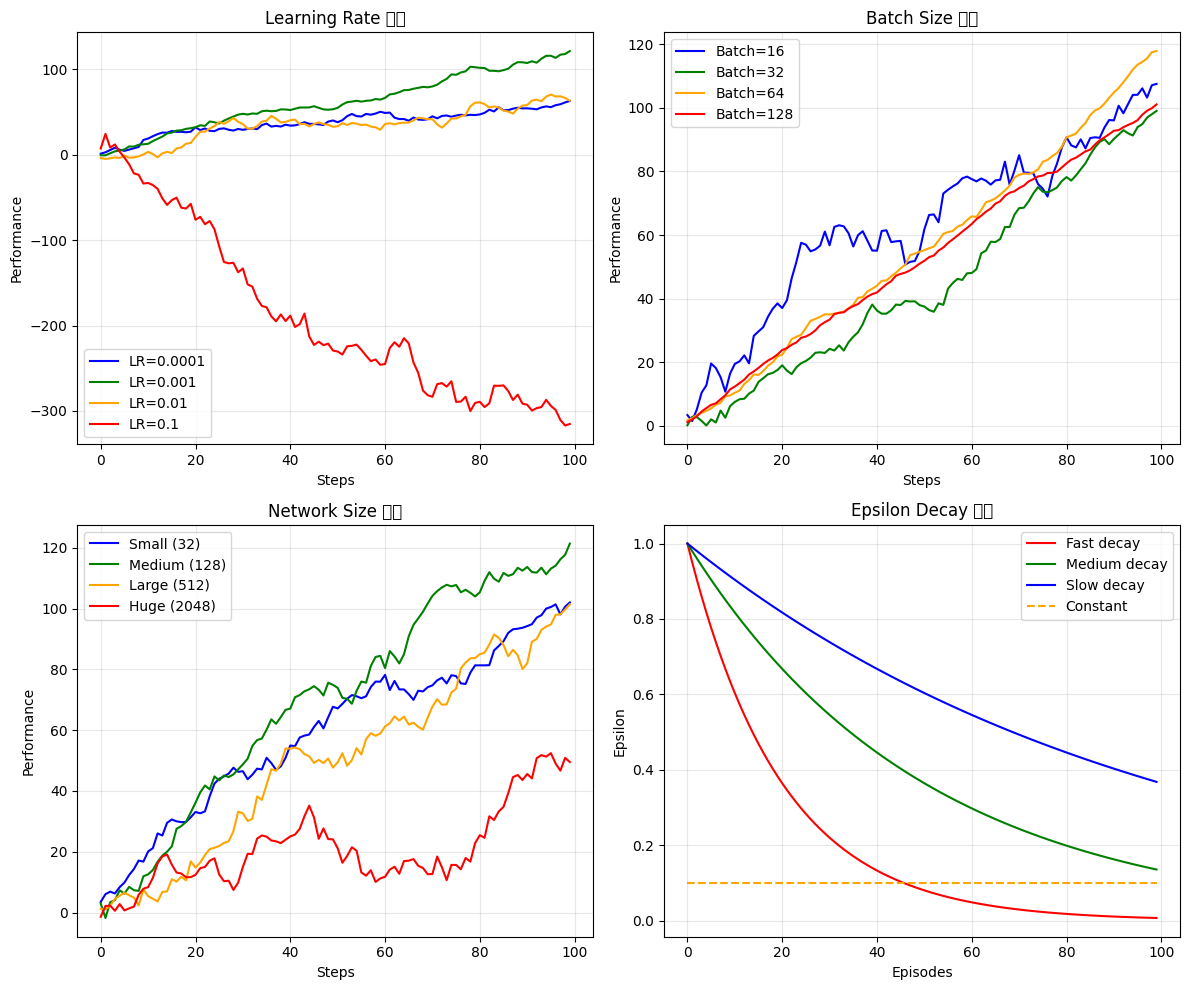

In [9]:
def deep_rl_tips():
    """Deep RL Ïã§Ï†Ñ ÌåÅ"""
    
    tips = """
    üéØ Deep RL Ïã§Ï†Ñ ÌåÅ
    ==================
    
    1. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
    ----------------------
    ‚Ä¢ Learning Rate: ÎÑàÎ¨¥ ÌÅ¨Î©¥ Î∞úÏÇ∞, ÎÑàÎ¨¥ ÏûëÏúºÎ©¥ ÌïôÏäµ ÏïàÎê®
    ‚Ä¢ Batch Size: ÌÅ¥ÏàòÎ°ù ÏïàÏ†ïÏ†ÅÏù¥ÏßÄÎßå ÎäêÎ¶º
    ‚Ä¢ Network Size: Î¨∏Ï†ú Î≥µÏû°ÎèÑÏóê ÎßûÍ≤å Ï°∞Ï†à
    ‚Ä¢ Epsilon Decay: ÌÉêÏÉâ-ÌôúÏö© Í∑†Ìòï Ï§ëÏöî
    
    2. ÎîîÎ≤ÑÍπÖ Ï†ÑÎûµ
    --------------
    ‚Ä¢ Í∞ÑÎã®Ìïú ÌôòÍ≤ΩÎ∂ÄÌÑ∞ ÏãúÏûë (CartPole ‚Üí LunarLander ‚Üí Atari)
    ‚Ä¢ Î≥¥ÏÉÅ Ïä§ÏºÄÏùºÎßÅ ÌôïÏù∏
    ‚Ä¢ Í∑∏ÎûòÎîîÏñ∏Ìä∏ ÌÅ¨Í∏∞ Î™®ÎãàÌÑ∞ÎßÅ
    ‚Ä¢ ÌïôÏäµ Í≥°ÏÑ† ÏãúÍ∞ÅÌôî
    
    3. ÏïàÏ†ïÏÑ± Í∞úÏÑ†
    --------------
    ‚Ä¢ Gradient Clipping ÏÇ¨Ïö©
    ‚Ä¢ Î≥¥ÏÉÅ Ï†ïÍ∑úÌôî (reward normalization)
    ‚Ä¢ Advantage Ï†ïÍ∑úÌôî
    ‚Ä¢ Learning rate scheduling
    
    4. ÏÑ±Îä• Í∞úÏÑ†
    ------------
    ‚Ä¢ Parallel environments ÏÇ¨Ïö©
    ‚Ä¢ GPU ÌôúÏö©
    ‚Ä¢ Vectorized operations
    ‚Ä¢ JIT compilation (PyTorch 2.0+)
    
    5. ÏùºÎ∞òÏ†ÅÏù∏ Ïã§Ïàò
    ----------------
    ‚ùå ÎÑàÎ¨¥ Î≥µÏû°Ìïú ÎÑ§Ìä∏ÏõåÌÅ¨Î°ú ÏãúÏûë
    ‚ùå ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÎèôÏãúÏóê Ïó¨Îü¨ Í∞ú Î≥ÄÍ≤Ω
    ‚ùå Ï∂©Î∂ÑÌïú ÌÉêÏÉâ ÏóÜÏù¥ ÌôúÏö©Îßå
    ‚ùå Î≥¥ÏÉÅ Ìï®Ïàò ÏûòÎ™ª ÏÑ§Í≥Ñ
    
    6. Í∂åÏû• ÏÇ¨Ìï≠
    ------------
    ‚úÖ ÏûëÏùÄ ÎÑ§Ìä∏ÏõåÌÅ¨Î°ú ÏãúÏûë
    ‚úÖ Ìïú Î≤àÏóê ÌïòÎÇòÏî© Î≥ÄÍ≤Ω
    ‚úÖ Î°úÍπÖÍ≥º ÏãúÍ∞ÅÌôî Ï≤†Ï†ÄÌûà
    ‚úÖ Ïû¨ÌòÑ Í∞ÄÎä•ÏÑ± ÏúÑÌï¥ ÏãúÎìú Í≥†Ï†ï
    """
    
    print(tips)
    
    # ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏòÅÌñ• ÏãúÍ∞ÅÌôî
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Learning Rate ÏòÅÌñ•
    ax = axes[0, 0]
    lrs = [1e-4, 1e-3, 1e-2, 1e-1]
    colors = ['blue', 'green', 'orange', 'red']
    for lr, color in zip(lrs, colors):
        if lr == 1e-3:
            curve = np.cumsum(np.random.randn(100) * 2 + 1)
        elif lr == 1e-4:
            curve = np.cumsum(np.random.randn(100) * 2 + 0.5)
        elif lr == 1e-2:
            curve = np.cumsum(np.random.randn(100) * 3 + 0.8)
        else:
            curve = np.cumsum(np.random.randn(100) * 10 - 2)
        ax.plot(curve, label=f'LR={lr}', color=color)
    ax.set_title('Learning Rate ÏòÅÌñ•')
    ax.set_xlabel('Steps')
    ax.set_ylabel('Performance')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Batch Size ÏòÅÌñ•
    ax = axes[0, 1]
    batch_sizes = [16, 32, 64, 128]
    for bs, color in zip(batch_sizes, colors):
        noise = 50 / bs
        curve = np.cumsum(np.random.randn(100) * noise + 1)
        ax.plot(curve, label=f'Batch={bs}', color=color)
    ax.set_title('Batch Size ÏòÅÌñ•')
    ax.set_xlabel('Steps')
    ax.set_ylabel('Performance')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Network Size ÏòÅÌñ•
    ax = axes[1, 0]
    sizes = ['Small (32)', 'Medium (128)', 'Large (512)', 'Huge (2048)']
    for size, color in zip(sizes, colors):
        if 'Small' in size:
            curve = np.cumsum(np.random.randn(100) * 2 + 0.7)
        elif 'Medium' in size:
            curve = np.cumsum(np.random.randn(100) * 2 + 1)
        elif 'Large' in size:
            curve = np.cumsum(np.random.randn(100) * 2.5 + 0.9)
        else:
            curve = np.cumsum(np.random.randn(100) * 3 + 0.6)  # Overfitting
        ax.plot(curve, label=size, color=color)
    ax.set_title('Network Size ÏòÅÌñ•')
    ax.set_xlabel('Steps')
    ax.set_ylabel('Performance')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Epsilon Decay ÏòÅÌñ•
    ax = axes[1, 1]
    epsilons = np.linspace(0, 100, 100)
    ax.plot(np.exp(-epsilons/20), label='Fast decay', color='red')
    ax.plot(np.exp(-epsilons/50), label='Medium decay', color='green')
    ax.plot(np.exp(-epsilons/100), label='Slow decay', color='blue')
    ax.plot(np.ones(100) * 0.1, label='Constant', color='orange', linestyle='--')
    ax.set_title('Epsilon Decay Ï†ÑÎûµ')
    ax.set_xlabel('Episodes')
    ax.set_ylabel('Epsilon')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

deep_rl_tips()

## 8. ÏöîÏïΩ Î∞è ÌïµÏã¨ Í∞úÎÖê

### Ïù¥Î≤à ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú Î∞∞Ïö¥ ÎÇ¥Ïö©

1. **Deep Q-Network (DQN)**
   - Neural NetworkÎ°ú Q Ìï®Ïàò Í∑ºÏÇ¨
   - Experience Replay: Îç∞Ïù¥ÌÑ∞ Ìö®Ïú®ÏÑ±
   - Target Network: ÌïôÏäµ ÏïàÏ†ïÏÑ±
   - Double DQN: Í≥ºÎåÄÌèâÍ∞Ä Ìï¥Í≤∞

2. **Policy Gradient Methods**
   - REINFORCE: Í∏∞Î≥∏ policy gradient
   - ÏßÅÏ†ë Ï†ïÏ±Ö ÏµúÏ†ÅÌôî
   - ÌôïÎ•†Ï†Å Ï†ïÏ±Ö ÌïôÏäµ

3. **Actor-Critic**
   - Policy + Value Í≤∞Ìï©
   - Advantage Ìï®Ïàò ÌôúÏö©
   - Î∂ÑÏÇ∞ Í∞êÏÜå

4. **PPO**
   - Trust Region Î∞©Î≤ï
   - Clipped objective
   - ÌòÑÎåÄ RLÏùò Ï£ºÎ†• ÏïåÍ≥†Î¶¨Ï¶ò

### ÏïåÍ≥†Î¶¨Ï¶ò ÏÑ†ÌÉù Í∞ÄÏù¥Îìú

| ÏÉÅÌô© | Ï∂îÏ≤ú ÏïåÍ≥†Î¶¨Ï¶ò | Ïù¥Ïú† |
|------|--------------|------|
| Ïù¥ÏÇ∞ ÌñâÎèô, Í∞ÑÎã®Ìïú ÌôòÍ≤Ω | DQN | ÏÉòÌîå Ìö®Ïú®Ï†Å, ÏïàÏ†ïÏ†Å |
| Ïó∞ÏÜç ÌñâÎèô Í≥µÍ∞Ñ | PPO, SAC | Ïó∞ÏÜç ÌñâÎèô ÏßÅÏ†ë Ï≤òÎ¶¨ |
| Î≥µÏû°Ìïú ÌôòÍ≤Ω | PPO | ÏïàÏ†ïÏÑ±Í≥º ÏÑ±Îä• Í∑†Ìòï |
| Î°úÎ¥á Ï†úÏñ¥ | TD3, SAC | Ïó∞ÏÜç Ï†úÏñ¥ ÌäπÌôî |
| Î©ÄÌã∞ÏóêÏù¥Ï†ÑÌä∏ | MAPPO | ÌòëÎ†• ÌïôÏäµ |

### Îã§Ïùå ÎÖ∏Ìä∏Î∂Å ÏòàÍ≥†
**Notebook 4: Ï∂îÎ°† Í∏∞Î∞ò RL - PlanningÍ≥º ReAct**
- Model-based planning
- MCTSÏôÄ AlphaZero
- ReAct: Reasoning + Acting
- LLMÍ≥º RLÏùò ÎßåÎÇ®

In [ ]:
# ÌïôÏäµ Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏
print("üéØ ÌïôÏäµ ÏôÑÎ£å Ï≤¥ÌÅ¨Î¶¨Ïä§Ìä∏:")
print("‚úÖ DQN Íµ¨ÌòÑ Î∞è Ïù¥Ìï¥")
print("‚úÖ Experience ReplayÏôÄ Target Network")
print("‚úÖ Policy Gradient (REINFORCE) Íµ¨ÌòÑ")
print("‚úÖ Actor-Critic Ïù¥Ìï¥")
print("‚úÖ PPO Íµ¨ÌòÑ")
print("‚úÖ ÏïåÍ≥†Î¶¨Ï¶ò ÎπÑÍµê Î∞è ÏÑ†ÌÉù Í∏∞Ï§Ä")
print("‚úÖ Deep RL Ïã§Ï†Ñ ÌåÅ")
print("\nüöÄ Îã§Ïùå Îã®Í≥Ñ: Ï∂îÎ°†(Reasoning)ÏùÑ ÌôúÏö©Ìïú ÏßÄÎä•Ï†Å RL!")